In [186]:
%run data_cleaning.py

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [188]:
df_cleaned.head()
status_counts = df_cleaned['Status'].value_counts()

# Display the counts
print("Counts of Status:")
print(status_counts)

Counts of Status:
0    3171
1     337
Name: Status, dtype: int64


In [189]:
df_cleaned.head()

,Age,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size (mm),Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
0,68,0,0,0,2,1,4,1,1,24,1,60,0
1,50,1,1,2,1,1,35,1,1,14,5,62,0
2,58,2,2,4,1,1,63,1,1,14,7,75,0
3,58,0,0,0,2,1,18,1,1,2,1,84,0
4,47,1,0,1,2,1,41,1,1,3,1,50,0


In [190]:
#Only taking people who are alive from column "Status" as it makes no sense to predict if the tumor will grow on dead people (0 is alive)
df_alive = df_cleaned[df_cleaned['Status'] == 0]
count_alive = df_alive['Status'].count()
print(count_alive)


3171


In [191]:
df_alive.head()


,Age,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size (mm),Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
0,68,0,0,0,2,1,4,1,1,24,1,60,0
1,50,1,1,2,1,1,35,1,1,14,5,62,0
2,58,2,2,4,1,1,63,1,1,14,7,75,0
3,58,0,0,0,2,1,18,1,1,2,1,84,0
4,47,1,0,1,2,1,41,1,1,3,1,50,0


In [192]:
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler

#Using a threshold of 40 mm (4 cm) because usually after the tumor reaches that size it becomes very serious
threshold = 40
X = df_alive.drop("Tumor Size (mm)", axis=1)
y = (df_alive["Tumor Size (mm)"] > threshold).astype(int)  # binary target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


logreg = LogisticRegression(max_iter=10000, random_state=42)
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]  # Probability of tumor growth beyond the threshold
logistic_loss = log_loss(y_test, y_pred_proba)

print("Logistic loss:", logistic_loss)

Accuracy: 0.9291338582677166
Logistic loss: 0.22656160854355592


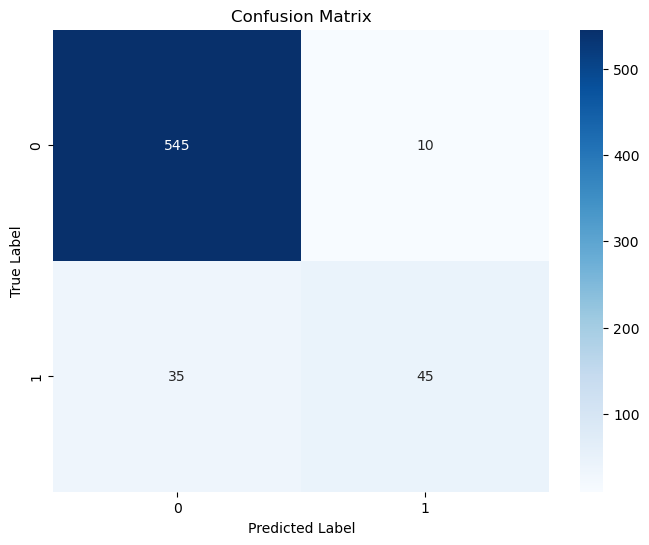

In [193]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [194]:
# Cross validationb, optimization
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, log_loss

threshold = 40
X = df_alive.drop("Tumor Size (mm)", axis=1)
y = (df_alive["Tumor Size (mm)"] > threshold).astype(int)  
scaler = StandardScaler()
logreg = LogisticRegression(max_iter=10000, random_state=42)

# Create a KFold object with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Creating lists because there will be 5 of them
cv_accuracy = []
cv_log_loss = []

# Splitting it into 5 
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
 
    logreg.fit(X_train_scaled, y_train)
    
    # Making predictions 
    y_pred = logreg.predict(X_test_scaled)
    y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]
    
    # Calculate metrics and add them to the listss
    accuracy = accuracy_score(y_test, y_pred)
    log_loss_score = log_loss(y_test, y_pred_proba)
    
    cv_accuracy.append(accuracy)
    cv_log_loss.append(log_loss_score)

print("Cross validation accuracy scores:", cv_accuracy)
print("Cross validation logistic loss scores:", cv_log_loss)

print("Mean of cross validation: ", np.mean(cv_accuracy))
print("Mean of cross validation logictic loss:", np.mean(cv_log_loss))



Cross validation accuracy scores: [0.9291338582677166, 0.919558359621451, 0.9321766561514195, 0.9337539432176656, 0.9305993690851735]
Cross validation logistic loss scores: [0.22656160854355592, 0.2708172366452691, 0.21608158412489523, 0.21883456284674616, 0.21907133469384088]
Mean of cross validation:  0.9290444372686852
Mean of cross validation logictic loss: 0.23027326537086146
